# 19기 KNN 정규세션 과제

## KNN 구현해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. KNN 구현 & 파라미터 튜닝
수업 내용 및 실습 자료를 참고하여 KNN을 구현하고 파라미터 튜닝을 하며 결과를 비교해주세요.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [blackfriday | Kaggle](https://www.kaggle.com/llopesolivei/blackfriday)

---

## 0. 데이터 불러오기

In [214]:
import pandas as pd
df = pd.read_csv("blackfriday.csv", index_col = 0)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,NaN,5780


## 1. Preprocssing / EDA

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     4998 non-null   int64  
 1   Product_ID                  4998 non-null   object 
 2   Gender                      4998 non-null   object 
 3   Age                         4998 non-null   object 
 4   Occupation                  4998 non-null   int64  
 5   City_Category               4998 non-null   object 
 6   Stay_In_Current_City_Years  4998 non-null   object 
 7   Marital_Status              4998 non-null   int64  
 8   Product_Category_1          4998 non-null   int64  
 9   Product_Category_2          3465 non-null   float64
 10  Product_Category_3          1544 non-null   float64
 11  Purchase                    4998 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 507.6+ KB


In [216]:
df.isna().sum()    # 결측치 확인

User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2            1533
Product_Category_3            3454
Purchase                         0
dtype: int64

In [217]:
df['Product_Category_2'].value_counts()

8.0     588
14.0    496
2.0     448
16.0    392
15.0    345
5.0     258
4.0     246
6.0     148
17.0    132
11.0    110
13.0    102
9.0      65
12.0     40
3.0      35
10.0     30
18.0     23
7.0       7
Name: Product_Category_2, dtype: int64

In [218]:
df['Product_Category_2'].fillna(8, inplace=True)
df['Product_Category_2'] = df['Product_Category_2'].astype(int)
df.drop(columns='Product_Category_3', inplace=True)

df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

In [219]:
for col in df.columns:
    print(col, df[col].unique())
    print()

User_ID [1001088 1004493 1005302 ... 1001176 1003015 1000837]

Product_ID ['P00046042' 'P00347742' 'P00048942' ... 'P00267142' 'P00085842'
 'P00358242']

Gender ['F' 'M']

Age ['0-17' '18-25' '26-35' '36-45' '46-50' '51-55' '55+']

Occupation [10  2  0 19  1  7 12  8  4  9  3 20 15 14 16 17  5  6 11 18 13]

City_Category ['A' 'B' 'C']

Stay_In_Current_City_Years ['3' '1' '2' '4+' '0']

Marital_Status [0 1]

Product_Category_1 [ 5  7  1  2  3  8 16 14 10 19 11 12  4 17 15  6 13 20 18  9]

Product_Category_2 [17  8  4  5 15 12 11  2 14  3 18 16  6 13 10  9  7]

Purchase [ 2010  4483  7696 ... 11701  2045  1413]



In [220]:
data = df.drop(columns=['User_ID', 'Product_ID'])

In [221]:
data = pd.get_dummies(data, columns=['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Product_Category_1', 'Product_Category_2'])

data.columns

Index(['Marital_Status', 'Purchase', 'Gender_F', 'Gender_M', 'Age_0-17',
       'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55',
       'Age_55+', 'Occupation_0', 'Occupation_1', 'Occupation_2',
       'Occupation_3', 'Occupation_4', 'Occupation_5', 'Occupation_6',
       'Occupation_7', 'Occupation_8', 'Occupation_9', 'Occupation_10',
       'Occupation_11', 'Occupation_12', 'Occupation_13', 'Occupation_14',
       'Occupation_15', 'Occupation_16', 'Occupation_17', 'Occupation_18',
       'Occupation_19', 'Occupation_20', 'City_Category_A', 'City_Category_B',
       'City_Category_C', 'Stay_In_Current_City_Years_0',
       'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2',
       'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4+',
       'Product_Category_1_1', 'Product_Category_1_2', 'Product_Category_1_3',
       'Product_Category_1_4', 'Product_Category_1_5', 'Product_Category_1_6',
       'Product_Category_1_7', 'Product_Category_1_8', 'Pr

In [233]:
data

,Marital_Status,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,...,Product_Category_2_9,Product_Category_2_10,Product_Category_2_11,Product_Category_2_12,Product_Category_2_13,Product_Category_2_14,Product_Category_2_15,Product_Category_2_16,Product_Category_2_17,Product_Category_2_18
0,0,2010,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,4483,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,7696,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,16429,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,5780,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,1,11701,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4994,1,2045,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4995,1,4505,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,1,1413,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [234]:
X = data.drop(columns = ['Purchase'])
y = data['Purchase']

In [235]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2023)

In [242]:
X_train.shape

(3998, 76)

In [243]:
X_test.shape

(1000, 76)

## KNN 구현 & 파라미터 튜닝

In [244]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

knn = KNeighborsRegressor()

In [245]:
params_1 = {
    "n_neighbors": [i for i in range(1,20,2)],
    "p": [1,2],
    "weights": ["uniform", "distance"]
}

In [246]:
grid_cv = GridSearchCV(knn, param_grid = params_1, cv = 5)

In [249]:
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [250]:
grid_cv.best_params_

{'n_neighbors': 19, 'p': 1, 'weights': 'uniform'}

In [251]:
knn_1 = KNeighborsRegressor(n_neighbors = 19, p = 1, weights = 'uniform')
knn_1.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=19, p=1)

In [252]:
#예측 진행
test_pred = knn_1.predict(X_test)

test_pred.shape

(1000,)

100%|██████████| 50/50 [00:27<00:00,  1.83it/s]

Best k value:  [21]


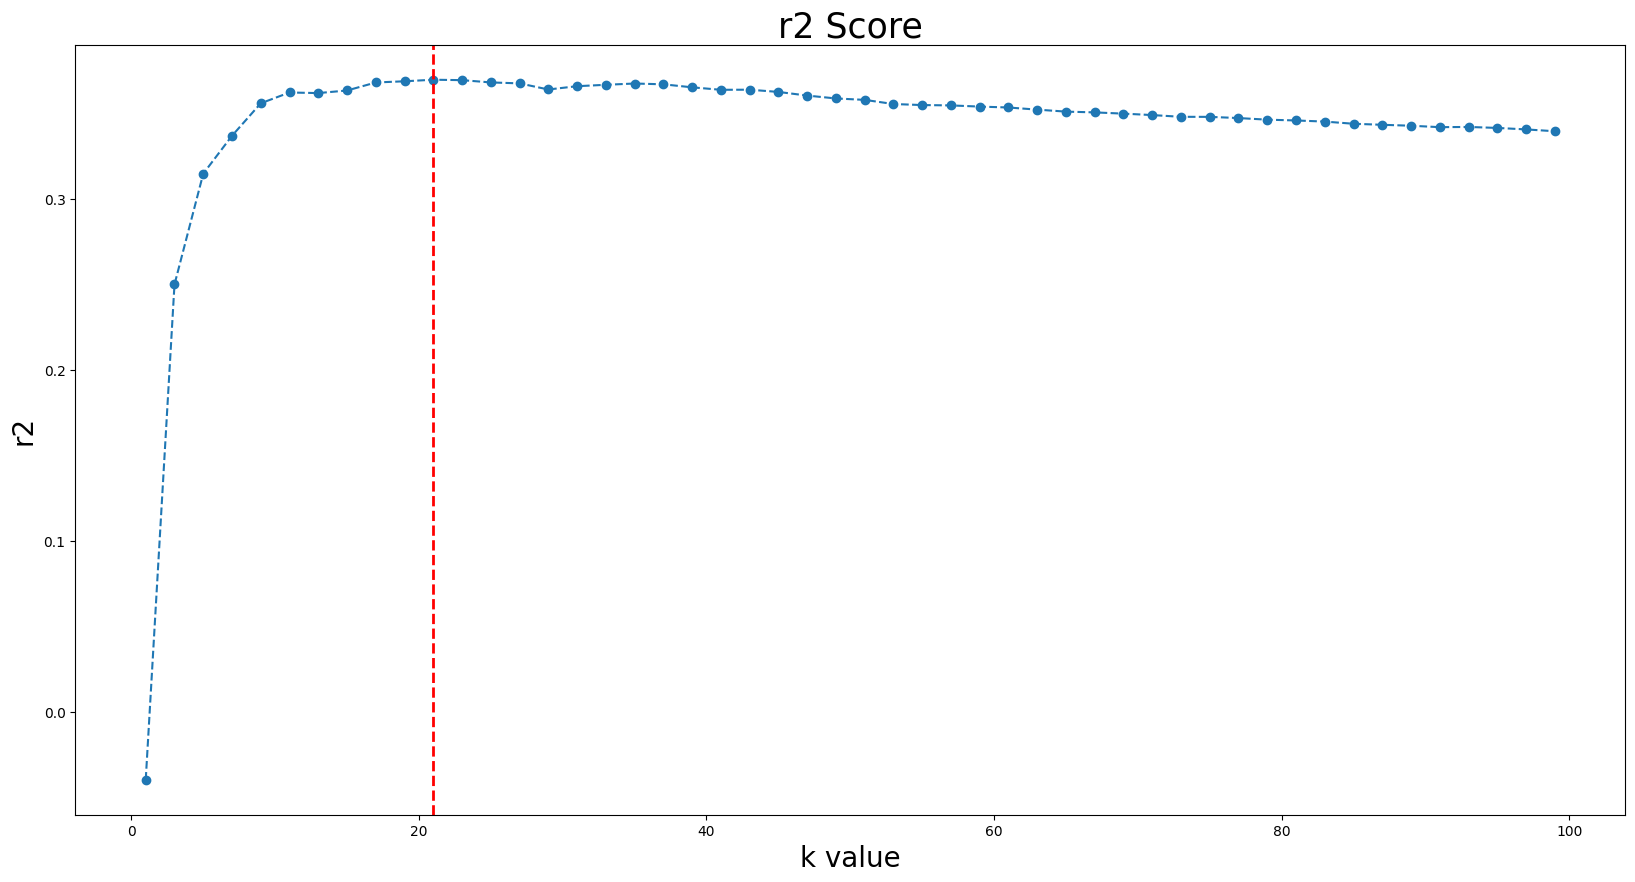

In [255]:
from tqdm import tqdm
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

k_list = [i for i in range(1, 100) if i%2 !=0]
cv_scores = []
for k in tqdm(k_list):
    regressor = KNeighborsRegressor(n_neighbors = k, p=2) # p=1: manhattan_distance, p=2: euclidean_distance
                                                          # p=l_p: minkowski_distance
    scores = cross_val_score(regressor, X_train, y_train, cv=10, scoring = 'r2')
    cv_scores.append(scores.mean())
    
best_k = [k_list[i] for i in range(len(cv_scores)) if cv_scores[i] == np.max(cv_scores)]
print("Best k value: ", best_k)

plt.figure(figsize=(20, 10))
plt.plot(k_list, cv_scores, marker='o', linestyle='dashed')
plt.xlabel('k value', fontsize=20)
plt.ylabel('r2', fontsize=20)
plt.title('r2 Score', fontsize=25)
plt.axvline(best_k[0], color='r', linestyle='--', linewidth=2)
plt.show()

In [257]:
knn_2 = KNeighborsRegressor(n_neighbors = 21, p = 2)
knn_2.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=21)

In [258]:
#예측 진행
test_pred = knn_2.predict(X_test)

test_pred.shape

(1000,)

## Evaluation

In [254]:
knn_1.score(X_test, y_test)

0.3719559655452822

In [259]:
knn_2.score(X_test, y_test)

0.37304092398418287